<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Подготовка-данных-к-анализу" data-toc-modified-id="Подготовка-данных-к-анализу-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных к анализу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Игровой-портрет-пользователя-каждого-региона" data-toc-modified-id="Игровой-портрет-пользователя-каждого-региона-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Игровой портрет пользователя каждого региона</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Изучение закономерностей, определяющих успешность игр

Интернет-магазин, продающий компьютерные игры по всему миру, хочет выявить потенциально популярный продукт, чтобы 
спланировавать рекламные кампании.


Для анализа предоставлена таблица с информацией из открытых источников. 

В таблице содержаться данные о продажах игр, оценки пользователей и экспертов, жанры и платформы игр - периода с 1980 по 2016 года.

Необходимо выявить правила и особенности по которым развивается рынок игровой индустрии.

**Цель данной работы:**  определить закономерности, влияющие на успешность игры.

**Исследование пройдет по следующим этапам**
  
   - Обзор данных
   - Изучение данных и обработка
   - Анализ данных
   - Проверка гипотез
  

## Изучение общей информации

In [1]:
import pandas as pd # импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv') 

In [3]:
df.head() 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()   #  получение общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод

Названия колонок записаны с нарушением стиля "snake_case" 

Количество значений в столбцах различается, значит есть пропущенные значения

В некоторых колонках необходимо изменить тип данных

## Подготовка данных к анализу

 - Приведем названия столбцов к нижнему регистру

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


 - Изучим столбцы

В столбцах `name`  `genre` по два пропущенных значения. Это одни и те же строки. Можно заменить пропуски на 'unknown'. Данные, которые без пропусков можем использовать при анализе платформ и продаж в разных регионах

In [7]:
df[df['name'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df[df['genre'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
df['name'] = df['name'].fillna('unknown')
df['genre'] = df['genre'].fillna('unknown')
print(df['name'].isna().sum())
print(df['genre'].isna().sum())

0
0


В столбце `year_of_release` есть пропуски. Изучив столбец с названиями игр, можно заметить указание года, вместе с названием. Конечно, это не всегда точно, обычно указывают год, следующий за годом выпуска. Но все же недалеко от настоящего года выпуска.
Заполним пропуски, где это возможно

In [10]:
df_year = df[df['year_of_release'].isna()] # выбрали строки с пропусками
print(df_year['name'].sort_values().unique()) # изучили названия игр

['AKB1/48: Idol to Guam de Koishitara...' 'Action Man-Operation Extreme'
 'Advance Wars: Days of Ruin' 'Adventure' 'Agarest Senki: Re-appearance'
 'Air-Sea Battle' 'Alex Rider: Stormbreaker' 'All-Star Baseball 2005'
 'Alone in the Dark: The New Nightmare' 'Aquaman: Battle for Atlantis'
 'Atsumare! Power Pro Kun no DS Koushien' 'B.L.U.E.: Legend of Water'
 'Backbreaker' 'Battle vs. Chess' 'Bejeweled 3' 'Beyond the Labyrinth'
 'Big Beach Sports 2' 'Bikkuriman Daijiten' 'BioShock 2' 'Breakaway IV'
 'Brothers in Arms: Furious 4' 'Build-A-Bear Workshop: Friendship Valley'
 "Cabela's Alaskan Adventure" 'Call of Duty 3' 'Call of Duty: Black Ops'
 'Captain America: Super Soldier' 'Charm Girls Club: My Fashion Mall'
 'Charm Girls Club: My Fashion Show' 'Chou Soujuu Mecha MG' 'Circus Atari'
 'Clockwork Empires' 'College Hoops 2K6' 'Combat'
 'Combat Elite: WWII Paratroopers'
 'Combat Wings: The Great Battles of WWII'
 "Cubix Robots for Everyone: Clash 'n' Bash" 'Custom Robo'
 "Dance! It's Your St

- Использовали функцию для замены пропусков

In [11]:
df['year_of_release'].isna().sum()

269

In [12]:
def year_lost(row):
    name = row['name']
    year = row['year_of_release']
    if pd.isna(year) and not pd.isna(name):
        separated = name.split(' ')
        for word in separated:
            if word.isdigit() and len(word)==4:
                return int(word)
    return year

df['year_of_release']= df.apply(year_lost, axis=1)

In [13]:
df['year_of_release'].isna().sum()

254

Изучим столбец `user_score`. В нем отражена оценка пользователей в числах, а тип записан, как строковый. Также встречается некорректное значение 'tbd'

Изменим тип данных на вещественный

In [14]:
df['user_score'].value_counts()  # изучили характеристику столбца

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [15]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Если использовать параметр coerce, некорректные значения принудительно заменяются на NaN,  с NaN можно проводить вычисления.

In [16]:
df['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: user_score, Length: 95, dtype: int64

Получим информацию о столбце  `rating`

In [17]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Получим описание столбца `critic_score`

In [18]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Изучим информацию о столбце `genre`

In [19]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
unknown            2
Name: genre, dtype: int64

Получим общую информацию о столбце `platform`

In [20]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Сделаем проверку таблицы на дубликаты

In [21]:
df.duplicated().sum()

0

Посчитаем пропуски


Пропуски в столбцах с оценками пользователей и экспертов в основном это одни и те же строки. То есть, если нет оценки пользователей, нет и оценки экспертов, и пропущено значение в столбце рейтинг от организации  ESRB

In [22]:
df.isna().sum()

name                  0
platform              0
year_of_release     254
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Исследуем соотношение пропусков в оценках с жанром и платформой игр

In [23]:
table = []
for genre in df.genre.unique():
    val = df.loc[df['critic_score'].isna() & df['user_score'].isna() & (df['genre'] == genre)].shape[0]
    table.append([genre, val])
table = pd.DataFrame(table, columns=['Жанр', 'Пропусков']).sort_values(by='Пропусков', ascending=False)
table

,Жанр,Пропусков
8,Action,1326
5,Misc,1184
0,Sports,1024
10,Adventure,945
3,Role-Playing,739
7,Simulation,483
2,Racing,464
9,Fighting,424
1,Platform,370
11,Strategy,354


In [24]:
table = []
for platform in df.platform.unique():
    val = df[df.critic_score.isna() & df.user_score.isna() & (df.platform == platform)].shape[0]
    table.append([platform, val])
table = pd.DataFrame(table, columns=['Платформа', 'Пропусков']).sort_values(by='Пропусков', ascending=False)
table 

,Платформа,Пропусков
3,DS,1387
12,PS,991
6,PS2,783
16,PSP,719
0,Wii,667
5,PS3,424
8,GBA,370
10,3DS,336
11,N64,319
22,PSV,286


Явной взаимосвязи между количеством пропусков по столбцам с оценками и жанром игры не обнаружилось.
Заметно только то, что чем популярнее жанр, тем больше пропусков, и наоборот, чем менее популярен, тем меньше

Такая же взимосвязь прослеживается и по платформам. Однако для мало популярных платформ оценки критиков и пользователей вообще отсутствуют. Видимо, наличие оценок, рейтингов и продвижение платформы вещи взаимосвязанные.


### Вывод

 - Пропуски в столбце `year_of_release` частично заполнили.
 - Заменили два значения в столбцах `name` и `genre`
 - Изменили тип данных в столбце `user_score`
 - Пропуски в столбцах с оценками пользователей и критиков, а также рейтингом оставили без изменений. В данном случае сложно  подобрать корректное значение для замены

 

## Анализ данных

 - Посчитаем суммарные продажи по всем регионам в отдельный столбец

In [25]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


 - Посчитаем сколько игр выпускалось в разные годы, построим график распределения продаж по годам

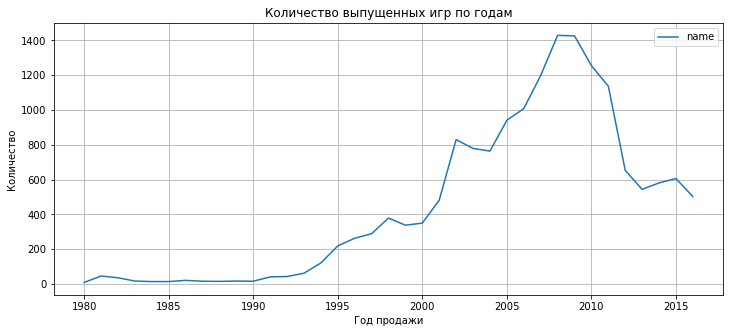

In [26]:
df_year_games = df.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.sort_values(by='year_of_release').plot(grid=True, figsize=(12, 5))
plt.title('Количество выпущенных игр по годам')
plt.legend()
plt.xlabel('Год продажи')
plt.ylabel('Количество')
plt.show();

*Вывод*

После девяностого года начинается неуклонный рост продаж видеоигр. Так продолжается до 2008 - 2009 годов. Далее вплоть до 2016 года интерес к видеоиграм с каждым годом снижается. Соответственно снижаются продажи

 - Выберем платформы с наибольшими суммарными продажами

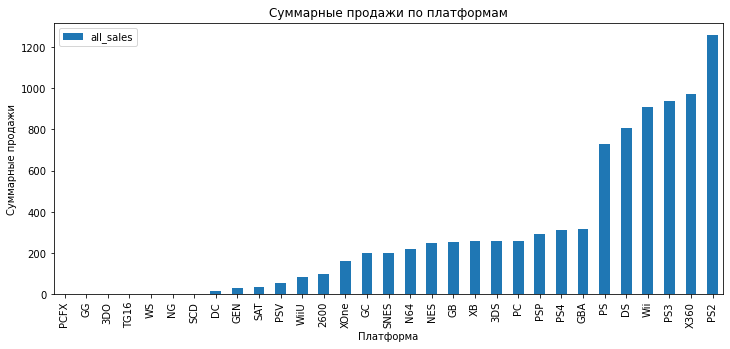

In [27]:
df_platform = df.pivot_table(index='platform', values='all_sales', aggfunc='sum')\
.sort_values(by='all_sales').plot(kind='bar', figsize=(12, 5))
plt.title('Суммарные продажи по платформам')
plt.legend()
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show();

 - Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. По графику определим за какой характерный срок появляются новые и исчезают старые платформы

In [28]:
big_platform = ["PS2", "X360", "PS3", "Wii", "DS", "PS", "GBA", "PS4", "PSP", "PC", "3DS", "XB","GB",\
"NES", "N64", "SNES", "GC", "XOne"]
df_big_platform = df.query('platform == @big_platform')

In [29]:
df_big_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


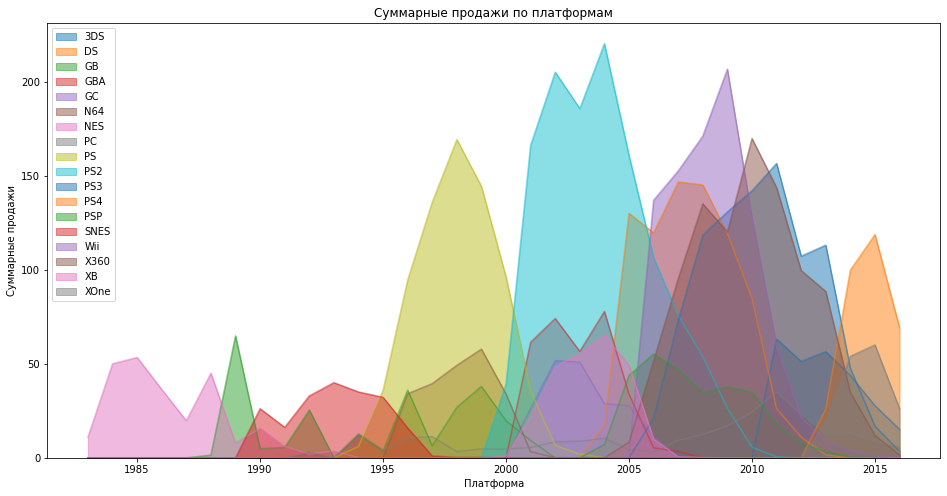

In [30]:
df_big_platform_pivot = df_big_platform.pivot_table(index='year_of_release', columns='platform', values='all_sales'\
                                                    , aggfunc='sum').plot(kind='area', stacked=False, figsize=(16, 8))
plt.title('Суммарные продажи по платформам')
plt.legend()
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show();

 *Вывод*
 
 У гигантов продаж, таких как PS2, X360, PS3, Wii, DS, PS - среднее время существования на рынке около 10 лет. Данные платформы появились в период подъема рынка рынка, возможно их технические решения и задали этот подъем.
Снижение продаж для большей части платформ Wii, PS3, X360, DS совпадает с общим падение продаж видеоигр. 
Платформы с меньшим объемом продаж, в два три раза, в отличие от гигантов, существуют примерно 5-7 лет 

 - **Актуальный период** для исследования выбрали с 2014 по 2016. Это период спада продаж на рынке видеоигр.  В этот период платформы гиганты продаж исчезают с прежними названиями. Заходят на рынок с новыми именами, предлагая свежие технические решения.  Они не достигают рекордов прежних продаж, но все же с 2014 на 2015 показывают небольшой рост. 

In [31]:
df_new = df.query('year_of_release >= 2014')

In [32]:
df_new = df_new.loc[:, 'name':'all_sales']

In [33]:
df_new_pivot = df_new.pivot_table(index='year_of_release', columns='platform', values='all_sales'\
                                                    , aggfunc='sum')

In [34]:
df_new['year_of_release'] = df_new['year_of_release'].astype(int)

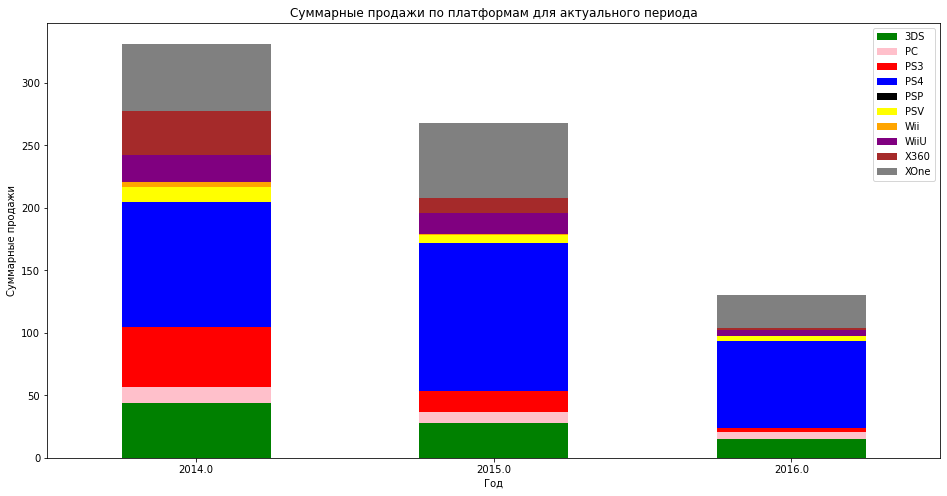

In [35]:
colors = ['green', 'pink', 'red', 'blue', 'black','yellow', 'orange', 'purple', 'brown', 'gray', 'blue']
df_new_pivot.plot(kind='bar', stacked=True, figsize=(16, 8), color= colors)
plt.title('Суммарные продажи по платформам для актуального периода')
plt.legend()
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=360)
plt.show();


 - Изучим платформы, которые появились на рынке в период общего спада и остаются в продажах на 2016 год PS4, XOne, 3DS, PC
 
 - Построим график "ящик с усами" по продажам в разбивке по платформам

In [36]:
new_platform = ["PS4", "XOne", "3DS", "PC"]  # выберем платформы, которые показывают рост продаж
df_new_platform = df.query('platform == @new_platform')
df_new_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011.0,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


In [37]:
df_new_platform['all_sales'].describe()

count    2133.000000
mean        0.465063
std         1.161237
min         0.010000
25%         0.030000
50%         0.090000
75%         0.360000
max        14.630000
Name: all_sales, dtype: float64

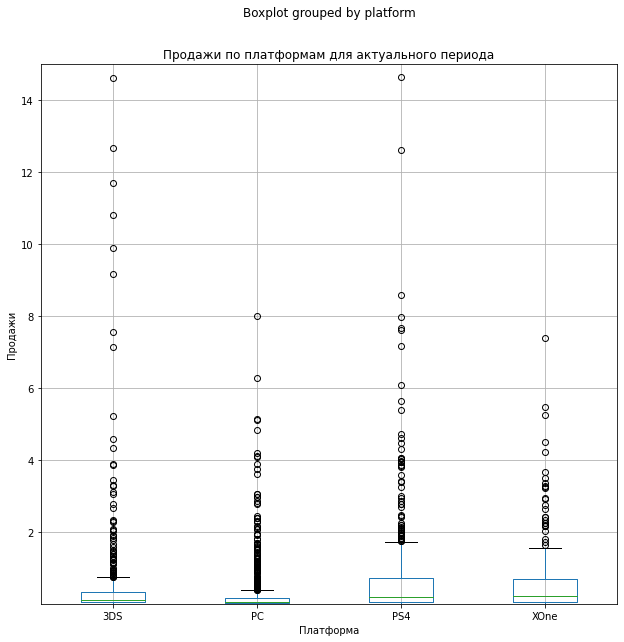

In [38]:
df_new_platform.boxplot(by='platform', column='all_sales', figsize=(10, 10))
plt.ylim(0.01, 15.0)
plt.title('Продажи по платформам для актуального периода')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()    # boxplot без ограничений

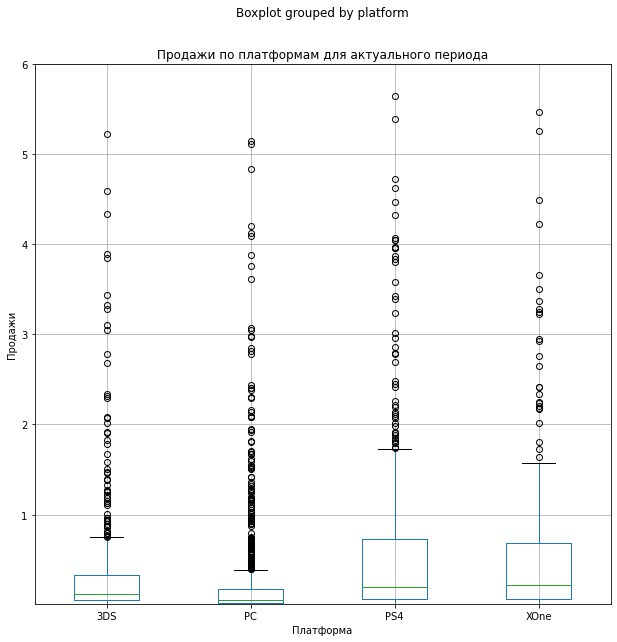

In [39]:
df_new_platform.boxplot(by='platform', column='all_sales', figsize=(10, 10))
plt.ylim(0.01, 6)
plt.title('Продажи по платформам для актуального периода')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()   # boxplot с ограничением

*Вывод*

По боксплоту построенному без ограничений можно сказать, что хиты продаж больше характерны для 3DS и PS4, а также РС. Хотя среднее значение по продажам для РС ниже, чем у остальных платформ. Платформа РС остается актуальной уже длительное время, возможно за счет рекламных компаний, стимулирующих скачки продаж.

Платформа XOne, меньше, чем остальные демострирует всплески, но дает стабильные продажи выше среднего. Расстояние между 2м и 3м квартилем значительно больше, чем между первым и вторым.

Самыми перспективными в плане продаж по боксплоту выглядят платформы PS4 и XOne. Средние продажи у них примерно на одном уровне и выше, чем у двух других платформ.



 - Исследуем влияние отзывов пользователей и критиков на продажи по платформе PC, как одной из самых долго существующих, платформ. Появилась в 1985 и присутствует на рынке и в 2016
 - Построим диаграмму рассеяния, посчитаем корреляцию между оценками и продажами

In [40]:
df_pc = df.query('platform == "PC"')
df_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
85,The Sims 3,PC,2009.0,Simulation,0.99,6.42,0.0,0.60,86.0,7.6,T,8.01
138,World of Warcraft,PC,2004.0,Role-Playing,0.08,6.21,0.0,0.00,93.0,7.3,T,6.29
192,Diablo III,PC,2012.0,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
195,Microsoft Flight Simulator,PC,1996.0,Simulation,3.22,1.69,0.0,0.20,NaN,NaN,NaN,5.11
218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,2.57,1.68,0.0,0.58,93.0,8.2,T,4.83


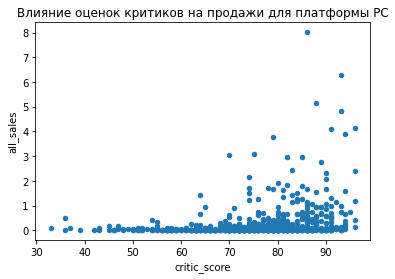

In [41]:
df_pc.plot(x='critic_score', y='all_sales', kind='scatter', title='Влияние оценок критиков на продажи для платформы РС');

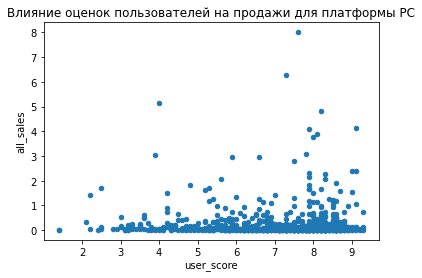

In [42]:
df_pc.plot(x='user_score', y='all_sales', kind='scatter', title='Влияние оценок пользователей на продажи для платформы РС');

In [43]:
print(df_pc['all_sales'].corr(df_pc['critic_score']))
print(df_pc['all_sales'].corr(df_pc['user_score']))

0.256886737894821
0.010475684621486438


*Вывод*

Диаграммы рассеяния и коэффициент корреляции указывает на слабую взаимосвязь между оценками критиков и пользователей и количеством продаж. Влияние оценки критиков, более выражено, чем оценки пользователей.

Причинно-следственную связь - оценки пользователей влияют на продажи или продажи на оценки пользователей - мы здесь установить не можем. Коэффициент корреляции проверяет только линейную взаимосвязь. Оценки пользователей и продажи не связаны линейно.

In [44]:
# Создадим две случайные выборки из 100 чисел и посчитаю коэффициент корреляции
import numpy as np
np.random.seed(38)
a = np.random.random(100)
b = np.random.random(100)
np.corrcoef(a, b)

array([[1.        , 0.14730438],
       [0.14730438, 1.        ]])

(array([ 14.,  73., 139., 195., 250., 188.,  84.,  47.,   8.,   2.]),
 array([-0.25713728, -0.19747387, -0.13781046, -0.07814705, -0.01848364,
         0.04117977,  0.10084318,  0.16050659,  0.22017   ,  0.2798334 ,
         0.33949681]),
 <BarContainer object of 10 artists>)

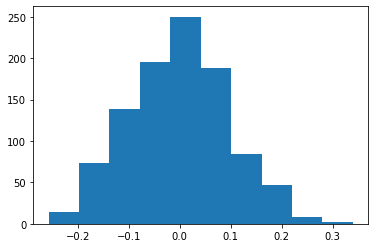

In [45]:
# Сгенерируем этот эксперимент 1000 раз и построю гистограмму коэффициентов корреляции
N = 1000
L = 100
result = []
for i in range(N):
    a = np.random.random(L)
    b = np.random.random(L)
    coef = np.corrcoef(a, b)[0, 1]
    result.append(coef)
plt.hist(result)

Значения коэффициента корреляции от - 0.2 до 0.2 могут быть получены на абсолютно случайных наборах данных размером в 100 

 - Изучим влияние оценки пользователей и критиков на продажи для платформ PS4, XOne, 3DS, PC за актуальны период.

Влияние оценки экспертов PS4: 0.41
Влияние оценки пользователей PS4: -0.03

Влияние оценки экспертов XOne: 0.42
Влияние оценки пользователей XOne: -0.07

Влияние оценки экспертов 3DS: 0.35
Влияние оценки пользователей 3DS: 0.22

Влияние оценки экспертов PC: 0.26
Влияние оценки пользователей PC: 0.01



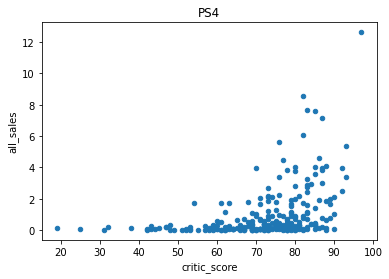

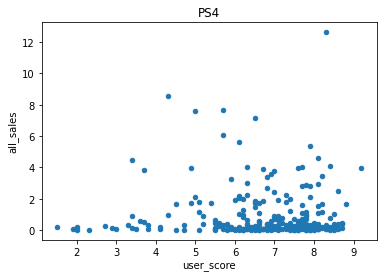

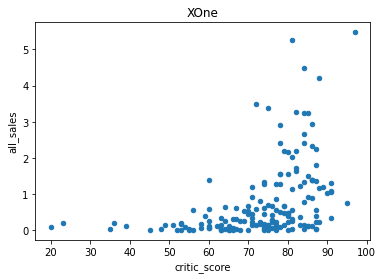

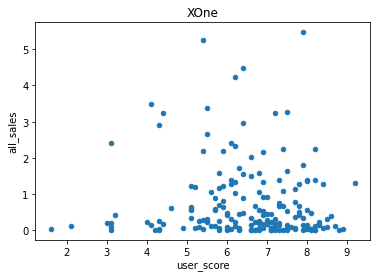

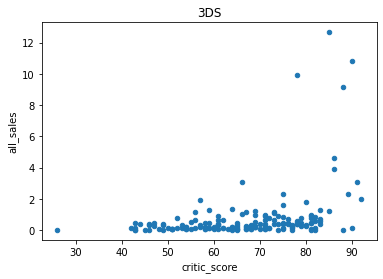

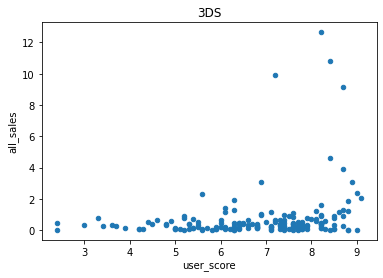

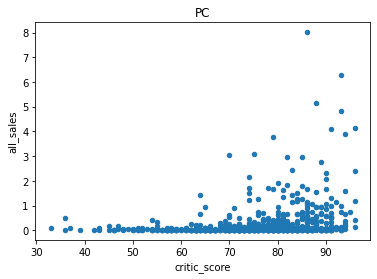

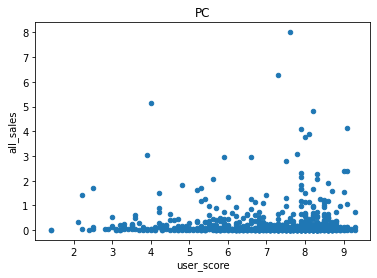

In [46]:
new_platform = ["PS4", "XOne", "3DS", "PC"]
for i in new_platform:
    df_new_platform_cor = df.query('platform == @i')
    df_new_platform_cor_cr = df_new_platform_cor['all_sales'].corr(df_new_platform_cor['critic_score'])
    df_new_platform_cor_us = df_new_platform_cor['all_sales'].corr(df_new_platform_cor['user_score'])
    print(f'Влияние оценки экспертов {i}: {df_new_platform_cor_cr:.2f}')
    df_new_platform_cor.plot(x='critic_score', y='all_sales', kind='scatter', title=i)
    print(f'Влияние оценки пользователей {i}: {df_new_platform_cor_us:.2f}')
    print()
    df_new_platform_cor.plot(x='user_score', y='all_sales', kind='scatter', title=i)
    
    

*Вывод*

Для платформ актуального периода влияние оценки критиков на продажи менее среднего. Коэффициент корреляции от 0,26 до 0,42, слабый. Но все же он более значим для продаж, чем оценка пользователей.

Влияние оценок пользователей минимально. Можно также предположить отсутствие линейной зависимости между оценками пользователей и продажами.

 - Изучим распределение игр по жанрам. Влияет ли жанр игры на величину продаж. Для изучения возьмем данные за актуальный период. Построим boxplot и круговую диаграмму.
 

In [47]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
unknown            2
Name: genre, dtype: int64

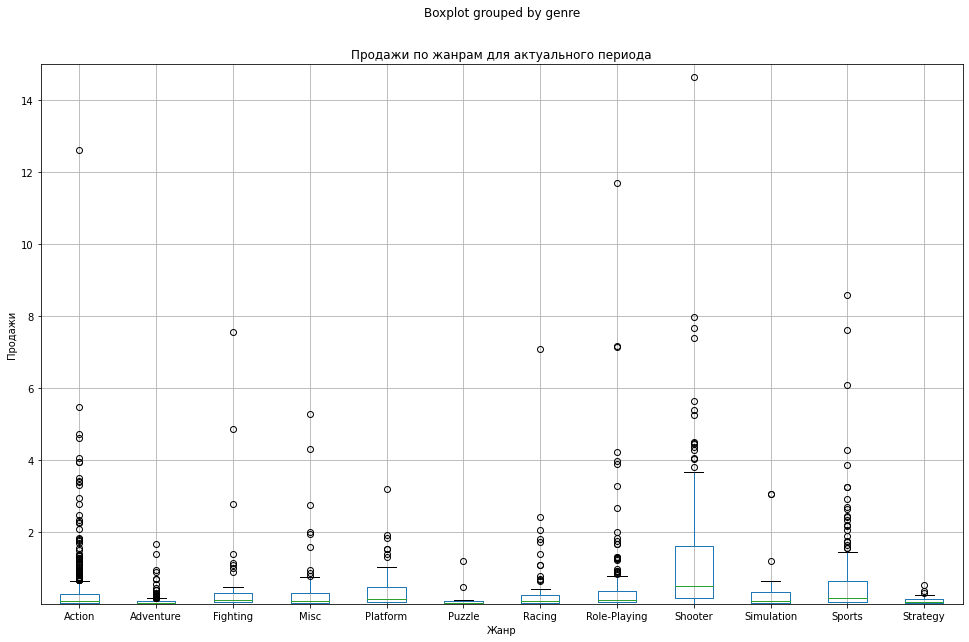

In [48]:
df_new.boxplot(by='genre', column='all_sales', figsize=(16,10))
plt.ylim(0.01, 15.0)
plt.title('Продажи по жанрам для актуального периода')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()  

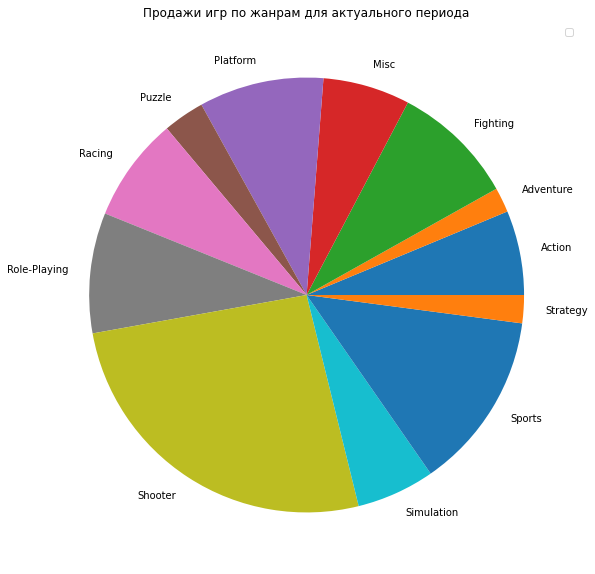

In [49]:
df_new_genre = df_new.pivot_table(index='genre', values='all_sales', aggfunc='mean')
df_new_genre.plot(y='all_sales', kind='pie', figsize=(12, 10))
plt.title('Продажи игр по жанрам для актуального периода')
plt.legend('')
plt.ylabel(' ')
plt.show()

*Вывод*

За исследуемый период самыми популярными, и соответственно, самыми продаваемыми жанрами были 
 - Shooter
 - Sports
 - Platform
 - Role-Playing
 - Fighting

Популярны жанры, создающие имитацию активности. В виртуальном мире игрок быстро бегает, высоко прыгает, у него серьезное вооружение. 
Эти жанры требуют хороший глазомер и моторику. Первые два места поделили спортивные игры и игры стрелялки.

На третьем месте по продажам простые и незамысловатые игры платформеры, где можно управлять мультяшными героями. Жанр не боится экспериментов, становясь привлекательным для разных аудиторий, решая в мультимире непростые жизненные ситуации.

Последние два места практически поровну делят ролевые игры и файтинги. Легкость этих жанров, понятный геймплей и яркиие персонажи обеспечивают им бесконечную популярность.


Меньше всего было продано игр в жанрах, требующих решения логических задач, преодоления препятствий.

    - Puzzle
    - Strategy
    - Adventure
    
    

### Игровой портрет пользователя каждого региона



  - Определим в актуальном периоде для пользователя каждого региона (NA, EU, JP)
   
    - Самые популярные платформы (топ-5)
    - Самые популярные жанры (топ-5)
    - Влияние рейтинга ESRB на продажи в отдельном регионе
  

In [50]:
df_new_country_plat = df_new.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
df_new_country_plat # посчитаем продажи по платформам для каждого региона

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30


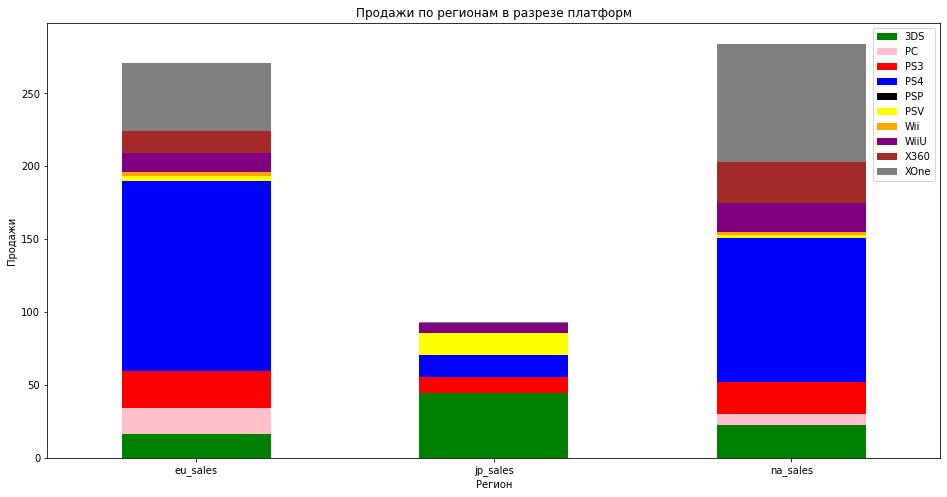

In [51]:
colores = ['green', 'pink', 'red', 'blue', 'black','yellow', 'orange', 'purple', 'brown', 'gray', 'blue', 'orange']
df_new_country_plat.T.plot(kind='bar', stacked=True, figsize=(16, 8), color= colores)
plt.title('Продажи по регионам в разрезе платформ')
plt.legend()
plt.xlabel('Регион')
plt.ylabel('Продажи')
plt.xticks(rotation=360)
plt.show();

*Вывод*

Топ-5 платформ для Европы  и Северной америки, примерно одинаковый. Для Америки это PS4, XOne, X360, PS3, 3DS  

Для Европы PS4, XOne, PS3, PC, 3DS

И этот топ-5 существенно отличается от топ-5 для Японии 3DS, PSV, PS4, PS3, Wi. 

Видимо,  Япония предпочитает использовать собственного производства технические решения для игр. 

In [52]:
df_new_country_genre = df_new.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
df_new_country_genre  # посчитаем продажи по жанрам каждого региона

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.58,72.53
Adventure,6.49,3.60,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


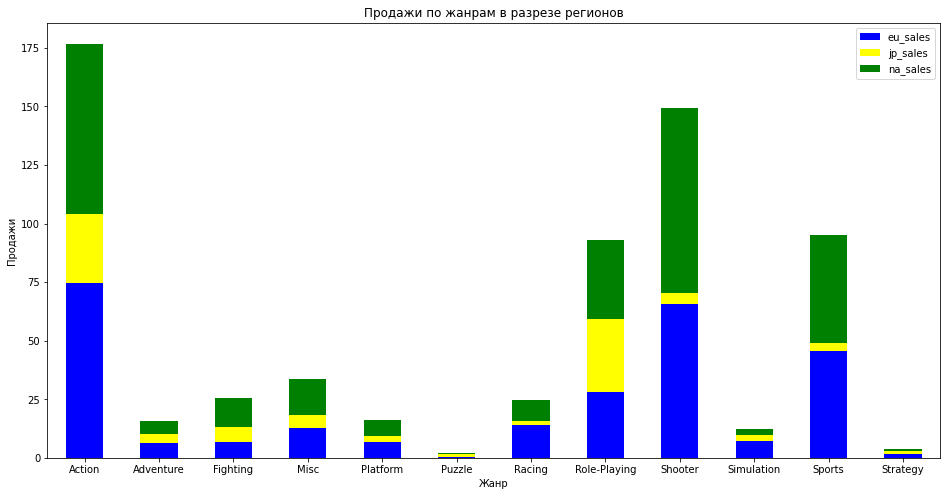

In [53]:
colore = ['blue', 'yellow','green']
df_new_country_genre.plot(kind='bar', stacked=True, figsize=(16, 8), color= colore)
plt.title('Продажи по жанрам в разрезе регионов')
plt.legend()
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.xticks(rotation=360)
plt.show();

*Вывод*

Топ-5 для Северной Америки
 - Shooter
 - Action
 - Sports
 - Role-Playng
 - Misc
 
Топ-5 для Европы
 - Action
 - Shooter
 - Sports
 - Racing
 - Misc
 
Топ-5 для Японии
 - Role-Playing
 - Action
 - Fighting
 - Misc
 - Sports
 
В распределениее игровых жанров в топ-5 Северная Америка и Европа совпадают с единственным отличием: 5-е место для американского континента это ролевые игры, для европейского гонки.

Топ-5 для Японии занимают жанры Action, Role-Playing и Fighting
Но 1 место топ-5 в Японии занимают ролевые игры, предполагающие создание собственного героя, развитие его способностей и  оружейных доспехов. С начала 2000-х годов события в ролевых играх разворачиваются в открытых мирах. Они детально проработаны и создают иллюзию живой вселенной.
В японский топ-5 попал жанр Fighting,  возможно, это влияние духа культуры единоборств, присущей Японии.

 - Поделим таблицу на строки,  где есть рейтинг ESRB и где значение пропущено. Посчитаем продажи, построим график.

In [54]:
df_new_less_esrb = df_new.loc[df_new['rating'].isna()]

In [55]:
region = ['na_sales', 'eu_sales', 'jp_sales']
for value in region:
    print('Продажи без рейтинга: ', value, round(df_new_less_esrb[value].sum()))

Продажи без рейтинга:  na_sales 65
Продажи без рейтинга:  eu_sales 59
Продажи без рейтинга:  jp_sales 57


In [56]:
df_new_esrb = df_new.loc[~df_new['rating'].isna()]

In [57]:
region = ['na_sales', 'eu_sales', 'jp_sales']
for value in region:
    print('Продажи с рейтингом: ', value, round(df_new_esrb[value].sum()))

Продажи с рейтингом:  na_sales 219
Продажи с рейтингом:  eu_sales 212
Продажи с рейтингом:  jp_sales 36


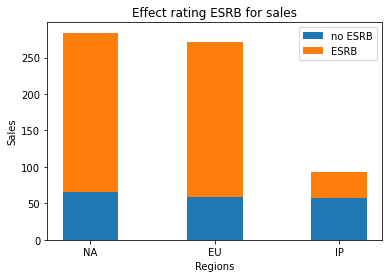

In [58]:
labels = ['NA', 'EU', 'IP']
sales_no_esrb = [65, 59, 57]
sales_esrb = [219, 212, 36]

width = 0.45      

fig, ax = plt.subplots()

ax.bar(labels, sales_no_esrb, width, label='no ESRB')
ax.bar(labels, sales_esrb, width, bottom=sales_no_esrb,
       label='ESRB')

ax.set_ylabel('Sales')
ax.set_xlabel('Regions')
ax.set_title('Effect rating ESRB for sales')
plt.legend()
plt.show();

*Вывод*

Только для Японии продажи с рейтингом ESRB и без него одинаковые. 

Рейтинг ESRB появился в Северной Америке в 1994 году. ESRB не имеет юридической силы. Вместо этого он саморегулируется, всем производителям консолей требуется, чтобы игры имели рейтинг ESRB, чтобы отображаться в их системах.
В Европе в 2003 году была запущен свой стандарт рейтинга видеоигр PEGI. Он практически повторяет настройку ESRB с небольшими отличиями.
В Японии есть CERO (организация, компьютерных рейтингов развлечений), которая присваивает играм рейтинги букв.

Игре обязательно должен быть присвоен рейтинг, чтобы было понятно для какого возраста она предназначена. Учитывая, что исследуемый период 2008-2016 гг, продажи без рейтинга, скорее,  укзывают на то, что значение пропущено, а не факт продаж без присвоения рейтинга.

 - Посчитаем продажи игр с разными рейтингами ESRB по регионам

In [59]:
df_new_esrb_piv = df_new_esrb.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
df_new_esrb_piv

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95


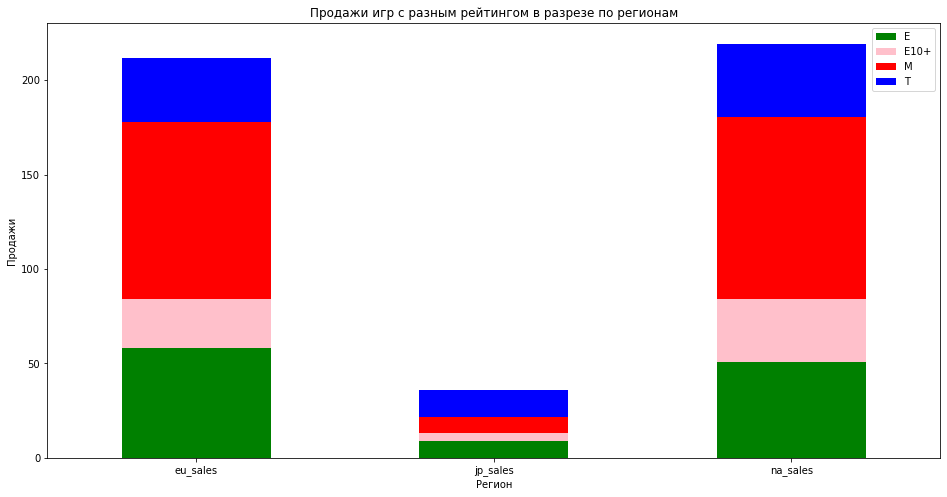

In [60]:
coloresr = ['green', 'pink', 'red', 'blue', 'yellow', 'purple']
df_new_esrb_piv.T.plot(kind='bar', stacked=True, figsize=(16, 8), color= coloresr)
plt.title('Продажи игр с разным рейтингом в разрезе по регионам')
plt.legend()
plt.xlabel('Регион')
plt.ylabel('Продажи')
plt.xticks(rotation=360)
plt.show();

*Вывод*

Больше всего видеоигр продается с рейтингом 
- М  - игры с этим рейтингом предназначены для тех, кто старше 17 лет
- Е - это базовый рейтинг, игра предназначена для всех возрастов
- Т  - этот рейтинг для игроков 13 лет и старше
- Е10+ - этим рейтингом отмечены игры для детей 10 лет и старше

Распределение в пропорциях для Европы и Северной Америки, одинаковое. Для Японнии больше продается игр с рейтингом Т для игроков 13 лет и старше. Более молодое поколение подвержено увлечению играми.

Европе и Америке это рейтинг М для игроков 17 лет и старше. 


На графике не отразились:
- *Рейтинг RP*, означает, - присвоение рейтинга ожидается. Игра еще не была оценена.
- *Рейтинг АО* - только для взрослых. Ни один из крупных производителей консолей на разрешает игры АО на своих системах. Издатели будут вносить изменения в свои игры, чтобы избежать этого рейтинга.

## Проверка гипотез

 - Средние пользовательские рейтинги платформ XOne и PC одинаковые
 - Средние пользовательские рейтинги жанров Action и Spots разные
 
Для проверки первой гипотезы сделаем срез для нужных платформ

In [61]:
df_new_x_one = df_new[df_new['platform'] == 'XOne']
df_new_x_one = df_new_x_one.loc[:, ['platform', 'user_score']]
df_new_x_one.head()

,platform,user_score
99,XOne,NaN
165,XOne,7.9
179,XOne,5.4
242,XOne,6.4
270,XOne,6.2


In [62]:
df_new_pc = df_new[df_new['platform'] == 'PC']
df_new_pc = df_new_pc.loc[:, ['platform', 'user_score']]
df_new_pc.head()

,platform,user_score
458,PC,3.9
1530,PC,5.4
1677,PC,NaN
1730,PC,7.9
2303,PC,5.7


Используем гипотезу о равенстве средних двух совокупностей

Сформулируем гипотезы

 - Нулевая гипотеза - средние пользовательские рейтинги для платформ XOne и PC - равны
 - Альтернативная гипотеза -  рейтинги  - отличаются
 
В оценках пользователей есть пропуски. При проведение статистического теста для первой и второй гипотез установим параметр nan_policy='omit', чтобы наличие NaN не влияло на вычисление значений отличных от NaN

In [63]:
print('Количество пропусков в df_new_x_one:', df_new_x_one['user_score'].isna().sum())
print('Количество пропусков в df_new_pc:', df_new_pc['user_score'].isna().sum())

Количество пропусков в df_new_x_one: 63
Количество пропусков в df_new_pc: 29


Запросим размер таблиц. Посчитаем дисперсию для каждой таблицы и сравним.

Данная информация нужна, чтобы определить, использовать параметр equal_var=False или нет

In [64]:
print(df_new_x_one.shape)
print(df_new_pc.shape)

(228, 2)
(151, 2)


In [65]:
print(np.var(df_new_x_one['user_score']))
print(np.var(df_new_pc['user_score']))

1.87954600550964
2.877374361730719


Таблицы, в которых мы сравниваем значения сильно отличаются по размеру. Разница между дисперсиями значительная.
Испрользуем параметр equal_var=False, тест посчитает дисперию отдельно по каждой таблице

In [66]:
alpha = .01 # задали критический уровень статистической значимости

results = st.ttest_ind(df_new_x_one['user_score'], df_new_pc['user_score'], equal_var=False, nan_policy='omit')
print('р - значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р - значение:  0.11601398086668985
Не получилось отвергнуть нулевую гипотезу


In [67]:
print('Средняя оценка пользователей для платформы XOne: {:.4}'.format(df_new_x_one['user_score'].mean()))
print('Средняя оценка пользователей для платформы PC: {:.4}'.format(df_new_pc['user_score'].mean()))

Средняя оценка пользователей для платформы XOne: 6.595
Средняя оценка пользователей для платформы PC: 6.298


*Вывод*

Средние оценки пользователей для платформ XOne и PC отличаются.

Полученное значение pvalue говорит о том, что вероятность получить такое значение случайно, примерно 12 процентов, хотя средние оценки неодинаковые. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками.


- Для проверки второй гипотезы выберем строки по условию, сделаем срез.

In [68]:
df_new_action = df_new[df_new['genre'] == 'Action']
df_new_action = df_new_action.loc[:, ['genre', 'user_score']]
df_new_action.head()

,genre,user_score
42,Action,8.3
165,Action,7.9
225,Action,NaN
231,Action,8.1
295,Action,6.3


In [69]:
df_new_sports = df_new[df_new['genre'] == 'Sports']
df_new_sports = df_new_sports.loc[:, ['genre', 'user_score']]
df_new_sports.head()

,genre,user_score
77,Sports,4.3
94,Sports,5.0
143,Sports,5.7
264,Sports,4.5
314,Sports,6.7


In [70]:
print('Количество пропусков для жанра Action:', df_new_action['user_score'].isna().sum()) 
print('Количество пропусков для жанра Sports:', df_new_sports['user_score'].isna().sum())

Количество пропусков для жанра Action: 322
Количество пропусков для жанра Sports: 34


In [71]:
print(df_new_action.shape) # изучим размер таблиц
print(df_new_sports.shape)

(619, 2)
(161, 2)


In [72]:
print(np.var(df_new_action['user_score']))  # посчитаем дисперсии
print(np.var(df_new_sports['user_score']))

1.8920844811753907
3.419837559675118


 - Для проведения второго теста применим параметр equal_var=False, так как размер выборок неодинаковый, и разница между дисперсиями значительная.  Применим параметр nan_policy='omit', чтобы пропуски не помешали вычислению


 - Для проверки второй гипотезы, также используем гипотезу о равенстве средних двух совокупностей

Сформулируем гипотезы
 
 - Нулевая гипотеза - средние оценки пользователей для жанра Action и жанра Sports - равны
 - Альтернативная гипотеза - средние оценки пользователей данных жанров отличаются


In [73]:
alpha = .01  # задали критический уровень статистической значимости

results = st.ttest_ind(df_new_action['user_score'], df_new_sports['user_score'], equal_var=False, nan_policy='omit')
print('р - значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р - значение:  1.1825550382644845e-14
Отвергаем нулевую гипотезу


In [74]:
print('Средняя оценка пользователей для жанкра Action: {:.4}'.format(df_new_action['user_score'].mean()))
print('Средняя оценка пользователей для жанра Sports: {:.4}'.format(df_new_sports['user_score'].mean()))

Средняя оценка пользователей для жанкра Action: 6.761
Средняя оценка пользователей для жанра Sports: 5.225


*Вывод*

Средние пользовательские рейтинги  жанров Action и Spots не равны. 

Значение pvalue меньше уровня alpha, - тест подверждает, что разница статистически значима.

## Вывод

Задача данного исследования состояла в том, чтобы выявить и исследовать, определяющие успешность игры закономерности.
Целью являлось отработка принципов работы с данными.

Для анализа была предоставлена таблица с информацией по продажам видеоигр в трех регионах, с 1983 по 2016 годов.

*Работа состояла из следующих этапов*

 - **Изучение данных из файла**
 
 - **Обработка данных**
   - Привели названия столбцов к нижнему регистру.
   - Изменили тип данных: в столбце с оценками пользователей строковый изменили на вещественный.
   - Заполнили пропуски, где было возможно.
   
   
 - **На этапе исследования данных**  посчитали суммарные продажи во всех регионах и записали их в отдельный столбец
 
     - Посчитали сколько игр выпускалось в разные годы. Построили график. На графике отразился неуклонный рост продаж с 90-х в до 2008-2009 гг. Далее вплоть до 2016 следует спад. Несмотря на общее снижение активности рынка видеоигр появляются новые платформы PS4, XOne, 3DS, показывающие рост продаж. Эти платформы мы изучили более детально.
     
     - Посчитали продажи по платформам, построили график с распределением продаж видеоигр по годам для каждой платформы. Среднее время существования для платформы зависит от количества продаж. Если продажи огромные, время существования на рынке около 10 лет. В среднем платформа существует около 5 лет.
     
     - Определили актуальный период для изучения. Им стал период с 2014 по 2016 гг. Данные за ближайший период наиболее актуальны для прогноза на быстро меняющемся рынке компьютерных игр.
    
**Выделили несколько потенциально прибыльных платформ**
   
  - Для каждой платформы построили график "ящик с усами"  по глобальным продажам игр. Изучив боксплот, определили самыми перспективными в плане продаж  выглядят платформы PS4 и XOne. Средние продажи у них примерно на одном уровне и выше, чем у двух других платформ.
  
  
  - Изучили влияние оценок пользователей и критиков на продажи. Построили диаграммы рассеяния, посчитали корреляцию по платформам  Определили, что влияние оценок критиков не оказывает заметного влияния на продажи. Коэффициент корреляции  пользовательской оценки и продаж оказался минимальным. Скорее можно сказать об отсутствии линейной зависимости рейтинга пользователей и успеха продаж.
  

 - *Изучили общее распределение игр по жанрам. Определили наиболее прибыльные жанры* Наиболее успешны оказались продажи игр в жанрах Shooter и Sports. Жанр Plaform занял третье место. Наименьшей популярностью на рынке пользуются Puzzle, Strategy

**В предоставленной таблице были отражены продажи по трем регионам:**  Северная Америка, Европа, Япония
 
**Составили портрет пользователя каждого региона**

 - *опредили топ-5 самых популярных платформ для каждого региона*  Для северо-американского и европейского регионов топ-5 платформ практически одинаков, лидируют PS4 и  XOne,  японский регион отличается, там лидер 3DS. 
 - *определили топ-5 самых популярных жанров видеоигр по регионам* В Северной Америке и Европе, примерно, одинаковые популярные жанры это Shooter и Sports, в Японии лидируют  Role-Playng и Fighting.
 - *изучили влияние рейтинга ESRB на продажи* В каждом из изучаемых регионов создана своя собственная система рейтингов видеоигр. Преобладают в продаже игры с рейтингом  M - от 17 и старше и Е - для всех возрастовв Европе и Северной Америке, с рейтингом Т - от 13 лет и старше в Японии.
 
**Проверили гипотезы, используя критерий Стьюдента для независимых выборок** 

 - средние пользовательские рейтинги для платформ  XOne и PC одинаковые
 - средние пользовательские рейтинги жанров Action и Sports разные
 
*Определили*

 - статтест не выявил статистически значимой разницы в оценках пользователей платформ  XOne и PC.
 - средние пользовательские рейтинги жанров Action и Sports отличаются и разница статистически значима.
    